In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [18]:
# Reading the Data 
def read_dataset():
    df = pd.read_csv("BankNote_Authentication.csv")

    #print (len(def.columns))
    X = df[df.columns[0:4]].values
    y = df[df.columns[4]]

    #Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return(X,Y)

In [17]:
# Define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels , n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] = 1
    return one_hot_encode

In [19]:
# Read the Dataset
X ,  Y = read_dataset()

(1372, 4)


In [20]:
# Shuffle the dataset to mix up the rows
X , Y = shuffle(X , Y , random_state = 1)

In [24]:
# Convert the dataset into train and test part
train_x , test_x , train_y , test_y = train_test_split(X ,Y , test_size=0.20,random_state=42)

In [25]:
# Inspect the shape of the training and testing 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(1097, 4)
(1097, 2)
(275, 4)


In [28]:
# Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1] , dtype=float)
n_dim = X.shape[1]
print("n_dim" , n_dim)
n_class = 2
model_path = "saved_models/neural_network_model" 

n_dim 4


In [29]:
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10

In [32]:
x = tf.placeholder(tf.float32 , [None , n_dim])
W = tf.Variable(tf.zeros([n_dim , n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32 , [None , n_class])

In [34]:
# Define the model
def multilayer_perceptron(x, weights, biases):

    # Hidden layer with RELU activations
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)

    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)

    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)

    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [35]:
# Define the weights and the biases for each layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [47]:
# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

# Call your model defined
y = multilayer_perceptron(x, weights, biases)

cost_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_)
)

training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)
saver.restore(sess, model_path)

prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

INFO:tensorflow:Restoring parameters from saved_models/neural_network_model


In [37]:
# Calculate the cost and the accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})

    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)

    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # print("Accuracy:", sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))

    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)

    accuracy = sess.run(accuracy, feed_dict={x: train_x, y_: train_y})
    accuracy_history.append(accuracy)

    print('epoch : ', epoch, ' - ', 'cost : ', cost, ' - MSE : ', mse_)
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)

epoch :  0  -  cost :  0.7396113  - MSE :  5.543846057654467
epoch :  1  -  cost :  0.75134027  - MSE :  4.560531206605575
epoch :  2  -  cost :  0.7705008  - MSE :  5.813070914753089
epoch :  3  -  cost :  0.814849  - MSE :  4.094671759393526
epoch :  4  -  cost :  0.7549911  - MSE :  5.3885711477001
epoch :  5  -  cost :  0.7333385  - MSE :  3.467268290508517
epoch :  6  -  cost :  0.6501354  - MSE :  4.483291331232262
epoch :  7  -  cost :  0.61350375  - MSE :  3.086282249613562
epoch :  8  -  cost :  0.5689867  - MSE :  3.8663528711452453
epoch :  9  -  cost :  0.54096645  - MSE :  2.9210380790543127
epoch :  10  -  cost :  0.5127912  - MSE :  3.5021482336292857
epoch :  11  -  cost :  0.48938546  - MSE :  2.8080265176822614
epoch :  12  -  cost :  0.46592394  - MSE :  3.2640898359381008
epoch :  13  -  cost :  0.44394237  - MSE :  2.697158615464867
epoch :  14  -  cost :  0.4218896  - MSE :  3.084310361392001
epoch :  15  -  cost :  0.400358  - MSE :  2.5795344151449924
epoch :  1

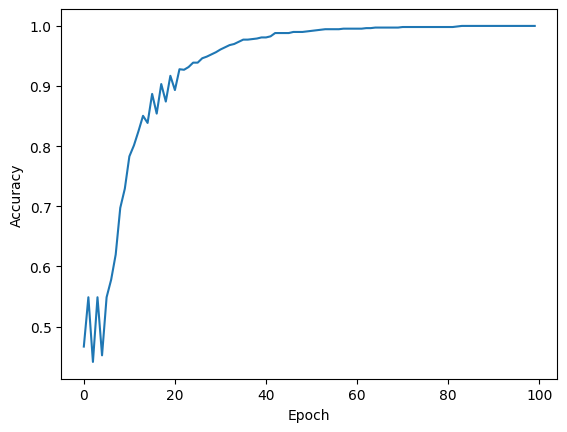

In [41]:
# Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [42]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(
    "Test Accuracy :",
    sess.run(accuracy, feed_dict={x: test_x, y_: test_y})
)


Test Accuracy : 1.0


In [43]:
# Print the final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %4f" % sess.run(mse))

MSE: 8.373353


In [56]:
# print (accuracy_run)
print("******************************************************")
print(" 0 Stands for Fake Note & 1 Stands for Real Note")
print("******************************************************")

y_data = test_y   # or train_y

for i in range(len(X)):
    prediction_run = sess.run(
        prediction,
        feed_dict={x: X[i].reshape(1, 4)}
    )

    accuracy_run = sess.run(
        accuracy,
        feed_dict={
            x: X[i].reshape(1, 4),
            y_: y_data[i].reshape(1, 2)
        }
    )

    print("Original Class :", y_data[i], ", Predicted values :", prediction_run)


******************************************************
 0 Stands for Fake Note & 1 Stands for Real Note
******************************************************
Original Class : [1. 0.] , Predicted values : [1]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [1]
Original Class : [1. 0.] , Predicted values : [1]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [0. 1.] , Predicted values : [0]
Original Class : [0. 1.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [1]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [1. 0.] , Predicted values : [1]
Original Class : [1. 0.] , Predicted values : [1]
Original Class : [1. 0.] , Predicted values : [0]
Original Class : [0. 1.] , Predicted valu

IndexError: index 275 is out of bounds for axis 0 with size 275

## The End !!